# THE PROBLEM STATEMENT



*   Hiring and retaining employees are extremely complex tasks that require capital, time and skills.
*   Small business owners spend around 40% of their working hours on tasks that do not generate income, such as hiring.
*   Companies spend 15-20% of the employees' salary to recruit new candidate.

<br>

*   So, in this project using the extensive data that Human Resources team collected, I will develop a model that could predict which employees are more likely to quit.



# IMPORT LIBRARIES AND DATASET

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
employee_df = pd.read_csv('Human_Resources.csv')

In [3]:
employee_df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
employee_df.tail(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [5]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
employee_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


*   There are 35 features in total, each contains 1470 data points.
*   Our target is the "Attrition" column.




# VISUALIZE DATASET

*   Let's replace 'Attritition' , 'Overtime' , 'Over18' column with integers before performing any visualizations


In [7]:
employee_df['Attrition'] = employee_df['Attrition'].apply(lambda x:1 if x == 'Yes' else 0)
employee_df['OverTime'] = employee_df['OverTime'].apply(lambda x:1 if x == 'Yes' else 0)
employee_df['Over18'] = employee_df['Over18'].apply(lambda x:1 if x == 'Y' else 0)



*   Let's see if we have any missing data, luckily we don't!



In [8]:
employee_df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince



*   let's look at the histogram of all features



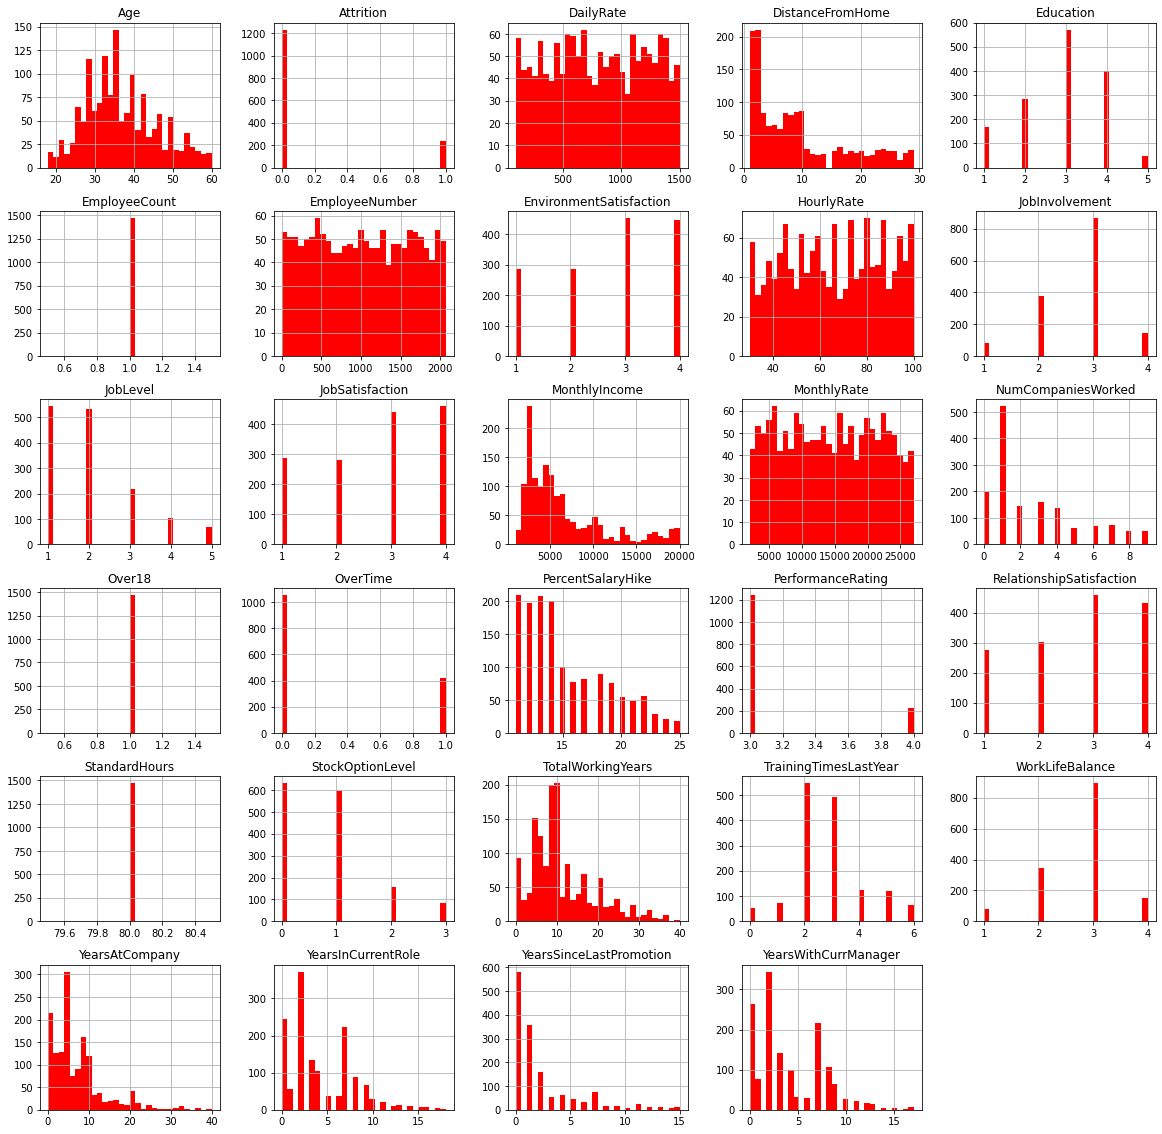

In [9]:
employee_df.hist(bins=30, figsize=(20,20), color='r')
plt.show()

*   Some Observations

   *   Mostly people are between 30-40 years old
   *   Looking at attrition, rate of attrition is very small (most employees decide to stay)
   *   A lot of employees are close to working environment (DistanceFromHome)
   *   'MonthlyIncome' and 'TotalWorkingYears' is tail-heavy distributed
   *   Some features takes single values (that we can drop)





*  Let's drop some columns since they do not change from one employee to the other (they take single value)



In [10]:
employee_df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis=1, inplace=True)



*   Let's see how many employees left the company! 



In [11]:
left_df = employee_df[employee_df['Attrition'] == 1]
stayed_df = employee_df[employee_df['Attrition'] == 0]

In [74]:
total_employees = len(employee_df)
employees_left = len(left_df)
employees_stayed = len(stayed_df)
print(f"Total Employees: {total_employees}")
print(f"Number of Employees Left: {employees_left}")
print(f"Left Employees Percentage: {employees_left / total_employees * 100 :.2f}%")

Total Employees: 1470
Number of Employees Left: 237
Left Employees Percentage: 16.12%


*   **Observation**: It seems that we are dealing with an imbalanced dataset



*   Now, let's compare the mean and std of the employees who stayed and left



In [13]:
left_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [14]:
stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


*   Some Observations

   *   Mean age of the employees who stayed is higher compared to who left (Age)
   *   Rate of employees who stayed is higher (DailyRate)
   *   Employees who stayed live closer to work (DistanceFromHome)
   *   Employees who stayed are generally more satisifed with their jobs (EnvironmentSatisfaction, JobSatisfaction)
   *   Employees who stayed tend to have higher stock option level (StockOptionLevel)




*   Let's look at correlations:



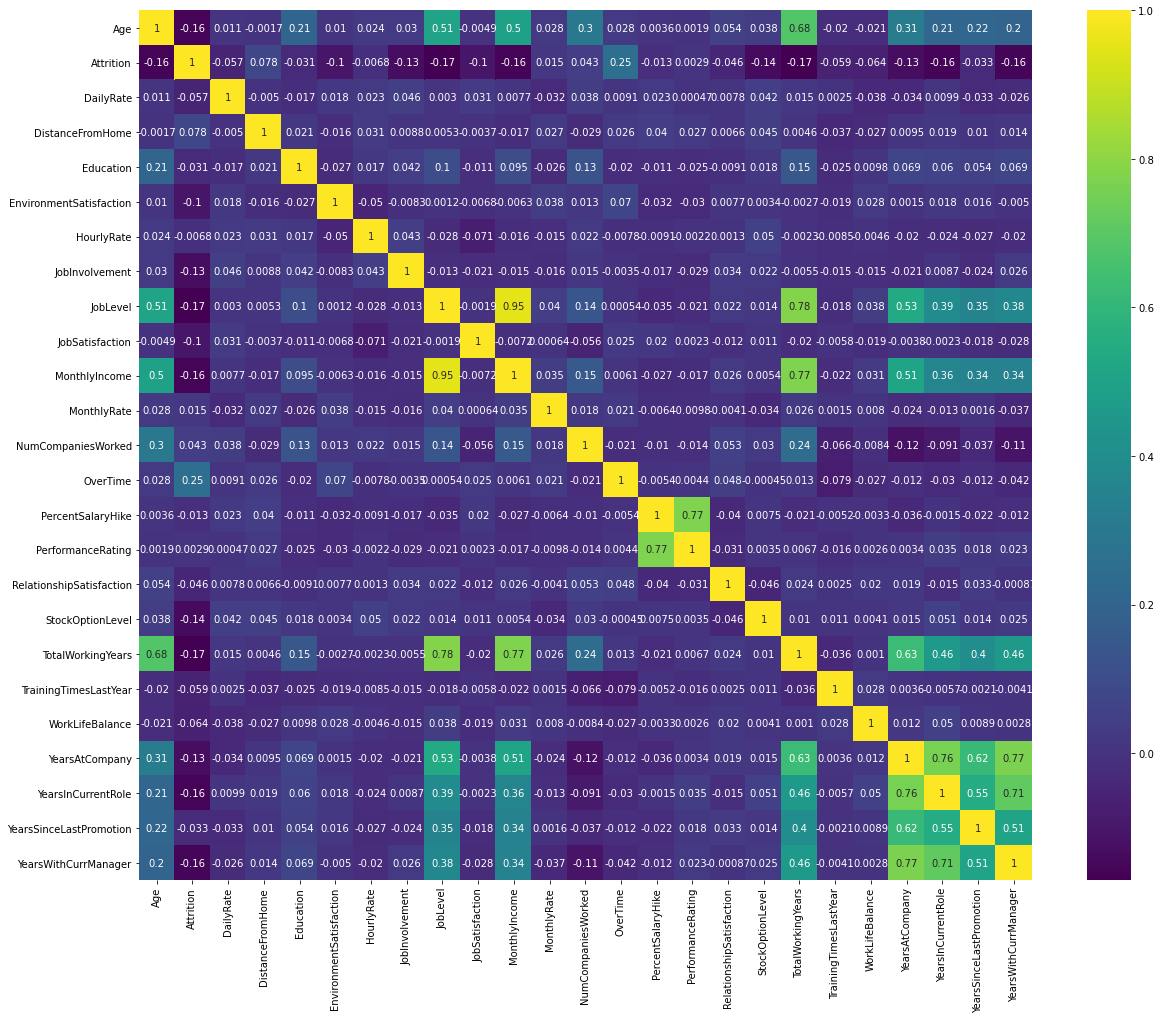

In [15]:
plt.figure(figsize=(20,16))
sns.heatmap(employee_df.corr(), annot=True, cmap='viridis')
plt.show()

*   Some Observations
   *   Monthly income is strongly correlated with Job level
   *   Job level is strongly correlated with total working years
   *   Monthly income is strongly correlated with total working years
   *   Age is stongly correlated with total working years
   *   Performance rating is strongly correlated with Percent Salary Hike

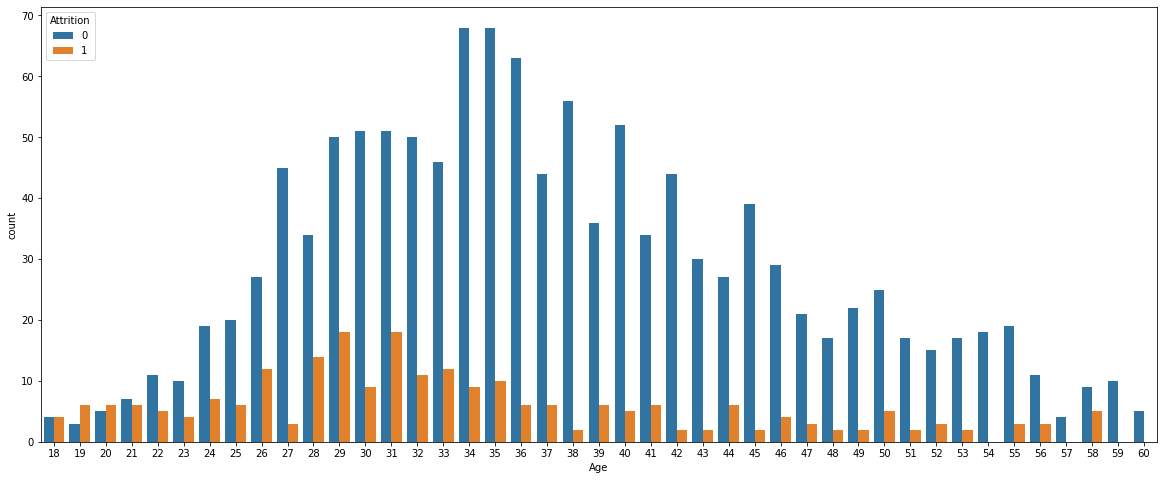

In [16]:
plt.figure(figsize=(20,8))
sns.countplot(x='Age', hue='Attrition', data=employee_df)
plt.show()

   * **Observation**: It seems younger crowd tends to leave job more

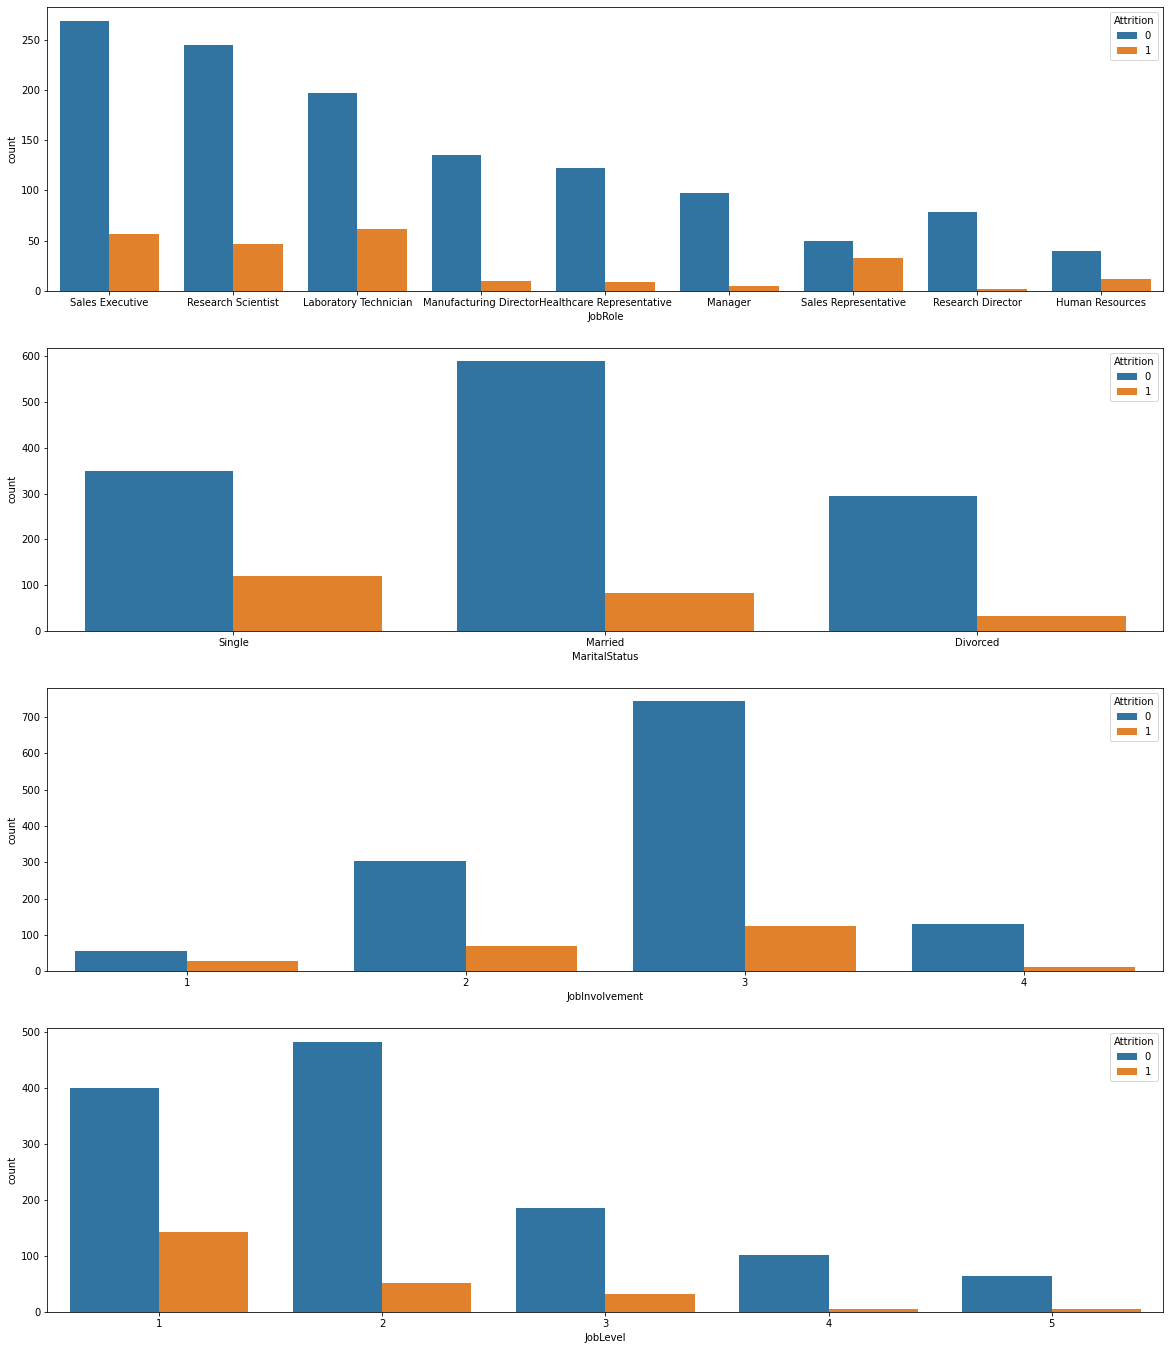

In [17]:
plt.figure(figsize=(20,24))

plt.subplot(411)
sns.countplot(x='JobRole', hue='Attrition', data=employee_df)

plt.subplot(412)
sns.countplot(x='MaritalStatus', hue='Attrition', data=employee_df)

plt.subplot(413)
sns.countplot(x='JobInvolvement', hue='Attrition', data=employee_df)

plt.subplot(414)
sns.countplot(x='JobLevel', hue='Attrition', data=employee_df)

plt.show()

*   Some Observations
   *   Sales Representitives tend to leave compared to any other job
   *   Single employees tend to leave compared to married and divorced
   *   Less involved employees tend to leave the company 
   *   Less experienced (low job level) employees tend to leave the company 



*   Let's look at some features:



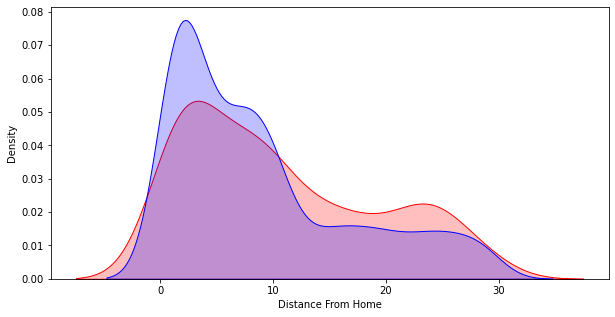

In [18]:
# Let's see the Distance From Home
plt.figure(figsize=(10,5))
sns.kdeplot(left_df['DistanceFromHome'], label='Left', shade=True, color='r')
sns.kdeplot(stayed_df['DistanceFromHome'], label='Stayed', shade=True, color='b')
plt.xlabel('Distance From Home')
plt.show()

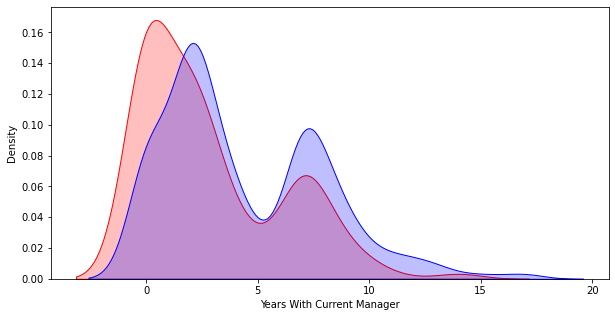

In [19]:
# Let's see Years With Current Manager
plt.figure(figsize=(10,5))
sns.kdeplot(left_df['YearsWithCurrManager'], label='Left', shade=True, color='r')
sns.kdeplot(stayed_df['YearsWithCurrManager'], label='Stayed', shade=True, color='b')
plt.xlabel('Years With Current Manager')
plt.show()

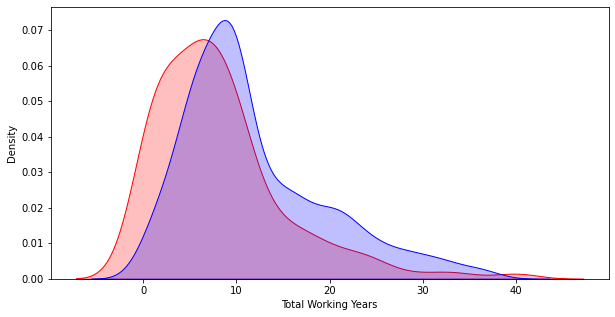

In [20]:
# Let's See Total Working Years
plt.figure(figsize=(10,5))
sns.kdeplot(left_df['TotalWorkingYears'], label='Left', shade=True, color='r')
sns.kdeplot(stayed_df['TotalWorkingYears'], label='Stayed', shade=True, color='b')
plt.xlabel('Total Working Years')
plt.show()


<AxesSubplot:xlabel='MonthlyIncome', ylabel='Gender'>

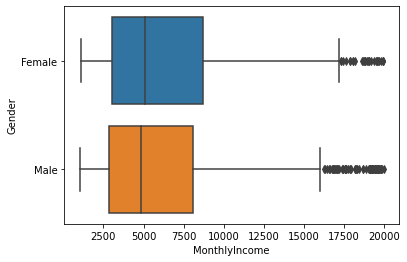

In [21]:
# Let's see the Gender vs. Monthly Income
sns.boxplot(x='MonthlyIncome', y='Gender', data=employee_df)

<AxesSubplot:xlabel='MonthlyIncome', ylabel='JobRole'>

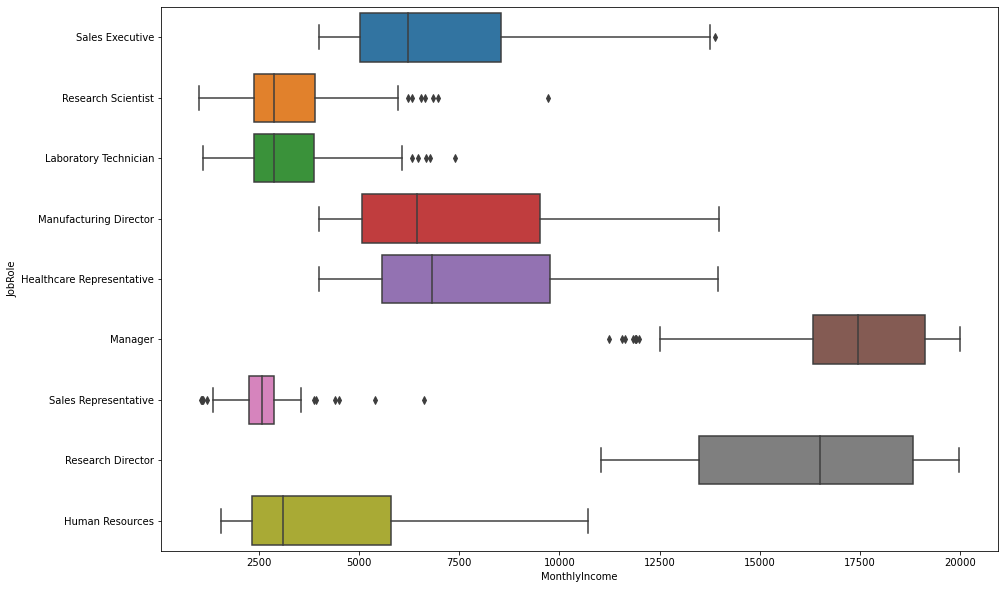

In [22]:
# Let's see the Gender vs. Monthly Income
plt.figure(figsize=(15,10))
sns.boxplot(x='MonthlyIncome', y='JobRole', data=employee_df)

# DATA SCALING / TRAIN-TEST SPLIT

In [88]:
# One-Hot Encoding of Categorical Variables
cat_columns = employee_df.select_dtypes(include='object').columns
employee_df = pd.get_dummies(employee_df, columns=cat_columns)

In [89]:
X = employee_df.drop('Attrition', axis=1)
y = employee_df['Attrition']

In [90]:
# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

In [91]:
# Scaling Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# MODEL 1: LOGISTIC REGRESSION CLASSIFIER

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [274]:
log_reg = LogisticRegression(max_iter=1000, C=10)
log_reg.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000)

In [275]:
y_pred_log = log_reg.predict(X_test)

Text(0.5, 15.0, 'Predicted label')

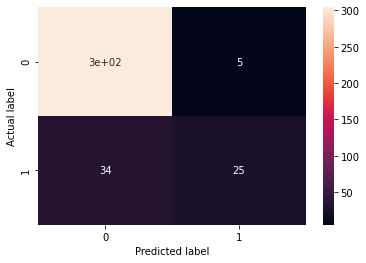

In [276]:
cm = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm, annot=True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [277]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       309
           1       0.83      0.42      0.56        59

    accuracy                           0.89       368
   macro avg       0.87      0.70      0.75       368
weighted avg       0.89      0.89      0.88       368



# MODEL 2: XGBOOST

In [256]:
from xgboost import XGBClassifier

In [290]:
xgb = XGBClassifier(n_estimators=100,
                    learning_rate=0.05,
                    max_depth=5,
                    min_child_weight=10,
                    subsample=0.7,
                    colsample_bytree=0.8,
                    gamma=0.05,
                    scale_pos_weight=3,
                    use_label_encoder=False)

xgb.fit(X_train, y_train)

[16:12:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.05, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=10, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=3, subsample=0.7,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [291]:
y_pred_xgb = xgb.predict(X_test)

Text(0.5, 15.0, 'Predicted label')

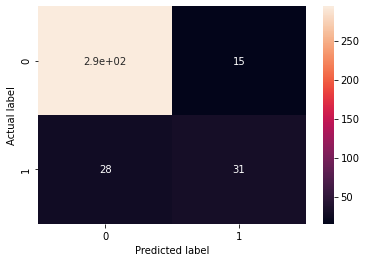

In [292]:
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [293]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       309
           1       0.67      0.53      0.59        59

    accuracy                           0.88       368
   macro avg       0.79      0.74      0.76       368
weighted avg       0.87      0.88      0.88       368



# MODEL 3: DEEP LEARNING MODEL 

In [219]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [324]:
ann = Sequential()

ann.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[-1], ))) 
ann.add(Dropout(0.5))

ann.add(Dense(units=32, activation='relu'))
ann.add(Dropout(0.5))

ann.add(Dense(units=1, activation='sigmoid')) # Output layer

In [325]:
ann.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_71 (Dense)             (None, 64)                3264      
_________________________________________________________________
dropout_49 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_72 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_50 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_73 (Dense)             (None, 1)                 33        
Total params: 5,377
Trainable params: 5,377
Non-trainable params: 0
_________________________________________________________________


In [326]:
ann.compile(optimizer='adam', loss='binary_crossentropy')

In [327]:
early_stop = EarlyStopping(monitor='val_loss', patience=7)

In [328]:
# Class Weights
weight_0 = (1 / employees_stayed)*(total_employees)/2.0 
weight_1 = (1 / employees_left)*(total_employees)/2.0

print('Weight for class 0: {:.2f}'.format(weight_0))
print('Weight for class 1: {:.2f}'.format(weight_1))

Weight for class 0: 0.60
Weight for class 1: 3.10


In [329]:
class_weights = {0: 1, 1: 3}

In [330]:
ann.fit(X_train, y_train, 
        batch_size=64, 
        epochs=100, 
        validation_data=(X_test, y_test),
        callbacks=[early_stop],
        class_weight=class_weights)

Epoch 1/100
18/18 [==============================] - 1s 15ms/step - loss: 0.9569 - val_loss: 0.5559
Epoch 2/100
18/18 [==============================] - 0s 6ms/step - loss: 0.9024 - val_loss: 0.5477
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 0.8645 - val_loss: 0.5439
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 0.8745 - val_loss: 0.5432
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 0.8637 - val_loss: 0.5271
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 0.8197 - val_loss: 0.5166
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 0.8235 - val_loss: 0.5221
Epoch 8/100
18/18 [==============================] - 0s 6ms/step - loss: 0.8174 - val_loss: 0.5132
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 0.8597 - val_loss: 0.5187
Epoch 10/100
18/18 [==============================] - 0s 4ms/step - loss: 0.8105 - val_loss: 0.4932
Epoch 11

<AxesSubplot:>

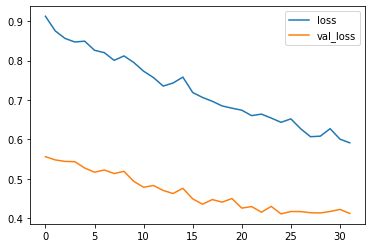

In [331]:
losses = pd.DataFrame(ann.history.history)
losses.plot()

In [332]:
y_pred_ann = (ann.predict(X_test) > 0.5).astype("int32")

Text(0.5, 15.0, 'Predicted label')

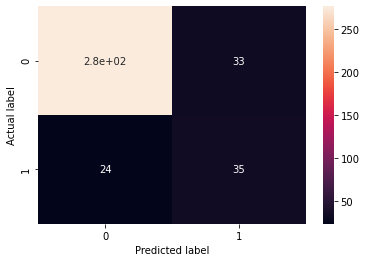

In [333]:
cm = confusion_matrix(y_test, y_pred_ann)
sns.heatmap(cm, annot=True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [334]:
print(classification_report(y_test, y_pred_ann))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       309
           1       0.51      0.59      0.55        59

    accuracy                           0.85       368
   macro avg       0.72      0.74      0.73       368
weighted avg       0.86      0.85      0.85       368

